In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import math

import librosa
import librosa.display

import warnings
warnings.filterwarnings('ignore')

In [4]:
path= "music genera classification"
genres=os.listdir(os.path.join(path,'genres_original/'))
print(genres)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [5]:
y,sr= librosa.load(os.path.join(path,'genres_original','classical','classical.00001.wav'))
print("y=",y,'\n')
print("Sample rate",sr,'\n')

y= [-0.01138306 -0.00216675  0.01687622 ... -0.02954102 -0.0378418
 -0.03924561] 

Sample rate 22050 



In [6]:
#basic thing to do is to trim the silence
audio,_=librosa.effects.trim(y)
print("y: ",y,'\n')
print('Duration :',audio.shape[0]/sr)

y:  [-0.01138306 -0.00216675  0.01687622 ... -0.02954102 -0.0378418
 -0.03924561] 

Duration : 30.013333333333332


Text(0.5, 1.0, 'Classical-1')

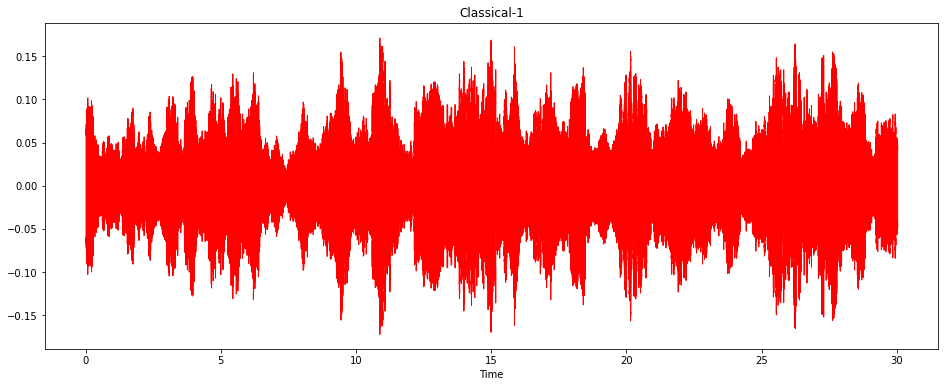

In [7]:
plt.figure(figsize=(16,6))
librosa.display.waveshow(y=audio,sr=sr,color='r')
plt.title('Classical-1')

# Seeing waveplot of all genres.

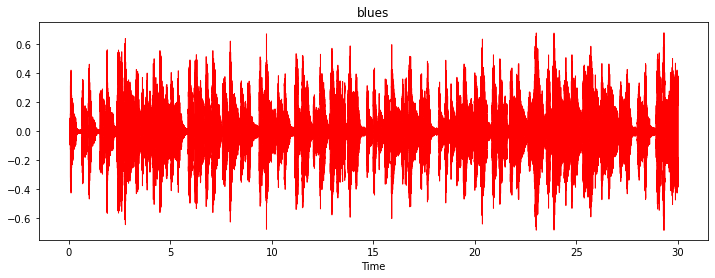

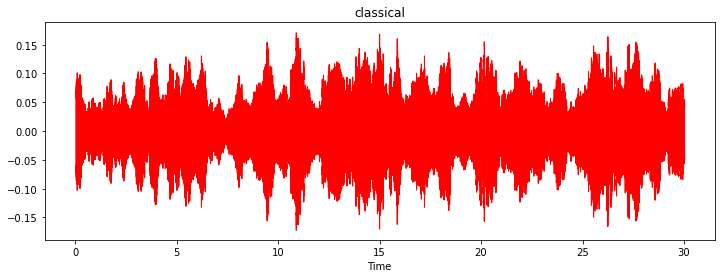

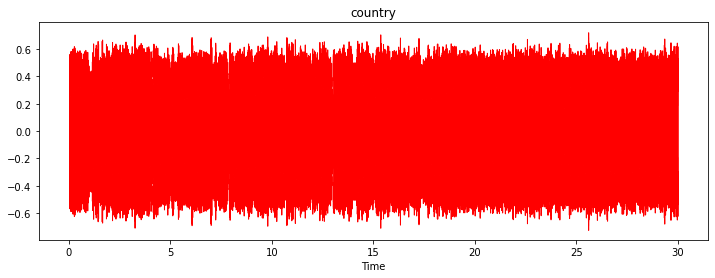

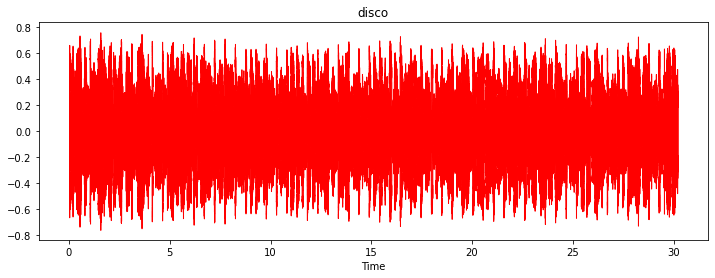

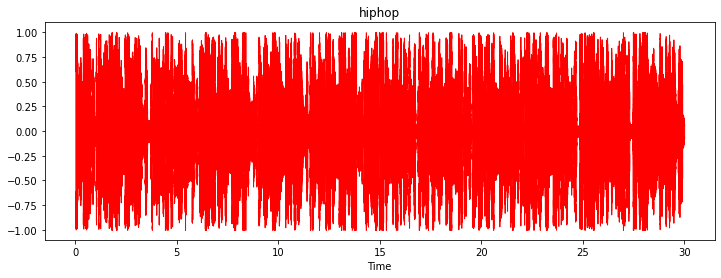

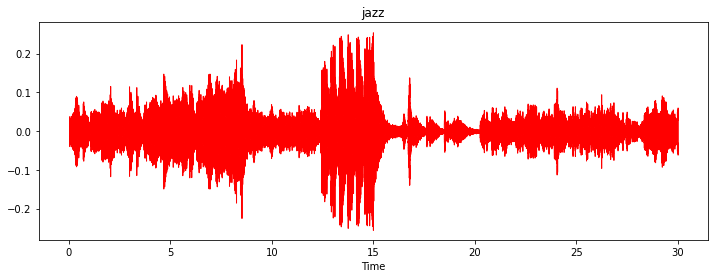

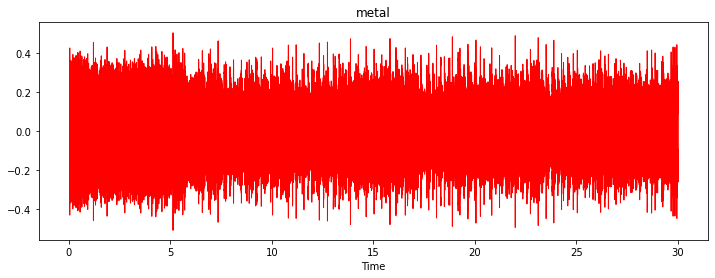

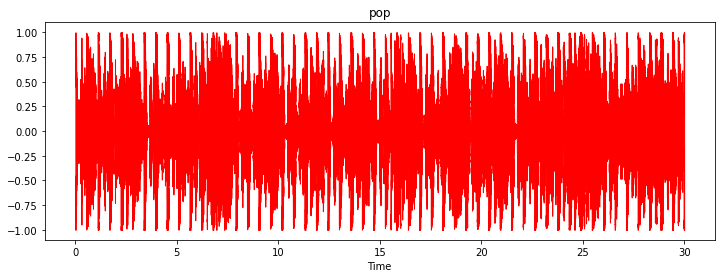

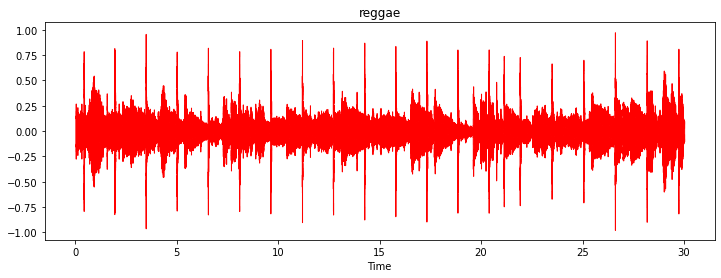

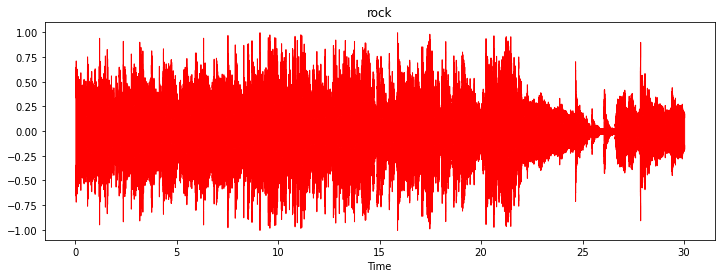

In [8]:
for i in genres:
    aud,sr=librosa.load(os.path.join(path,'genres_original',i,f'{i}.00001.wav'))
    plt.figure(figsize=(12,4))
    librosa.display.waveshow(y=aud,sr=sr,color='r')
    plt.title(f'{i}')

Text(0.5, 1.0, 'rock')

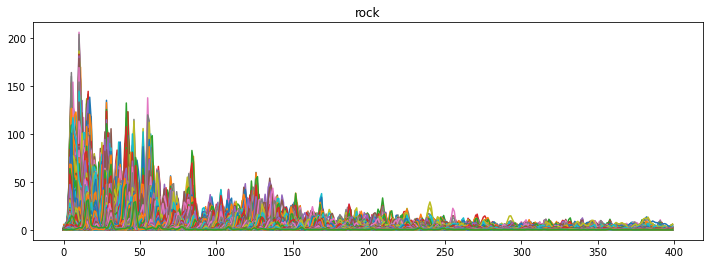

In [66]:
n_fft=2048 #default value recommended, n_ftt represents the number of samples that will be converted at once.
hop_length=512 #understandable by name
win_length=2048 #window using which samples are converted.

for i in genres:
    aud,sr=librosa.load(os.path.join(path,'genres_original',i,f'{i}.00001.wav'))
    aud_ft= np.abs(librosa.stft(aud, n_fft = n_fft, hop_length = hop_length,win_length=win_length))
    
    # print(np.shape(aud_ft)) #(1025,1302) 
plt.figure(figsize=(12,4))
plt.plot(aud_ft[:400,:])#viewing only upto 400 Hz
plt.title(f'{i}')

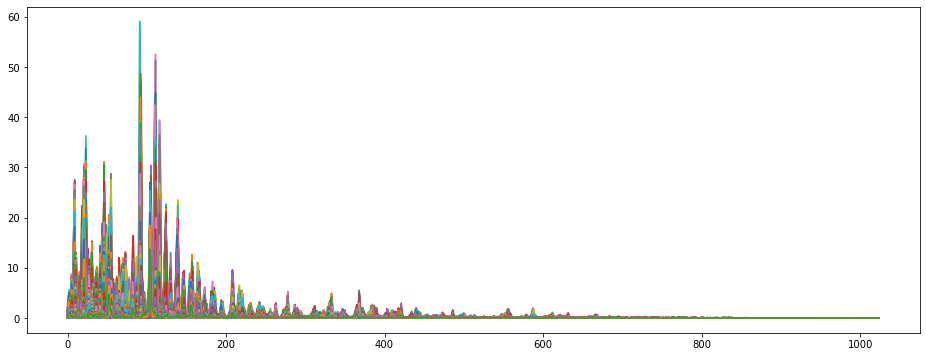

In [65]:
music_stft = np.abs(librosa.stft(audio,n_fft=n_fft,hop_length= hop_length))
plt.figure(figsize = (16,6))
plt.plot(music_stft);

In [16]:
# Converting from amplitute(Linear scale) to decibels, a log scale
music_stft_decibels = librosa.amplitude_to_db(music_stft, ref= np.max) 

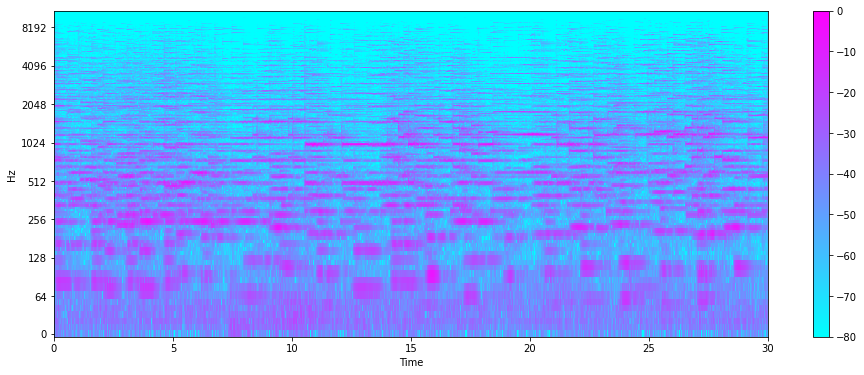

In [17]:
# Plotting the spectogram 
plt.figure(figsize=(16,6))
librosa.display.specshow(music_stft_decibels, sr = sr, hop_length= hop_length, x_axis='time', y_axis='log', cmap = "cool");
plt.colorbar();

Text(0.5, 1.0, 'Metal Mel Spectogram')

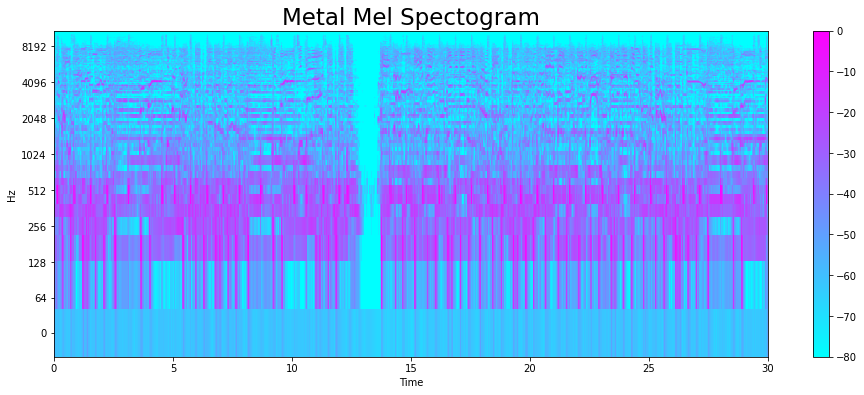

In [18]:
metal_sample = "metal/metal.00032.wav"
y, sr = librosa.load(os.path.join(path,"genres_original",metal_sample))
y,_ = librosa.effects.trim(y)
    
S = librosa.feature.melspectrogram(y, sr = sr)
S_DB = librosa.amplitude_to_db(S, ref= np.max)

plt.figure(figsize = (16,6))


librosa.display.specshow(S_DB, sr = sr, hop_length=hop_length, x_axis='time', y_axis='log', cmap='cool')
# https://stackoverflow.com/questions/66235936/why-spectrogram-from-librosa-library-have-different-time-duration-of-the-actual
# Why it is important to provide hop length here
plt.colorbar();
plt.title("Metal Mel Spectogram", fontsize = "23")

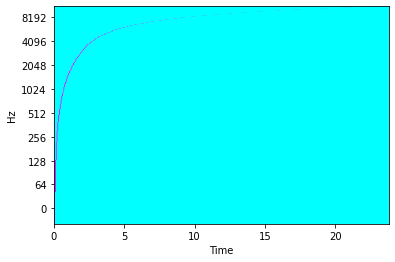

In [19]:
n_mels=128
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)
librosa.display.specshow(mel, sr = sr, hop_length=hop_length, x_axis='time', y_axis='log', cmap='cool');

In [20]:
zero_crossing_rate=librosa.zero_crossings(y) # has a boolean output
sum(zero_crossing_rate)

98145

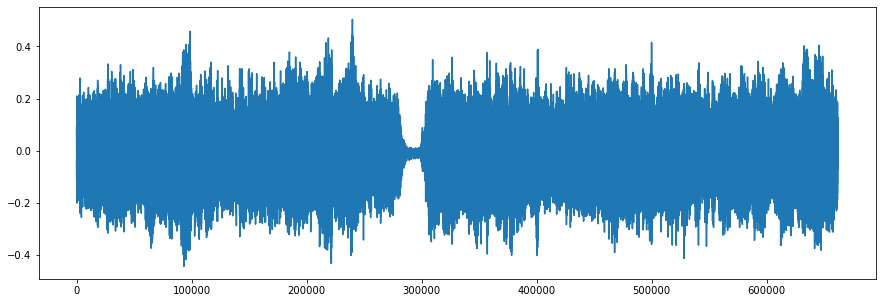

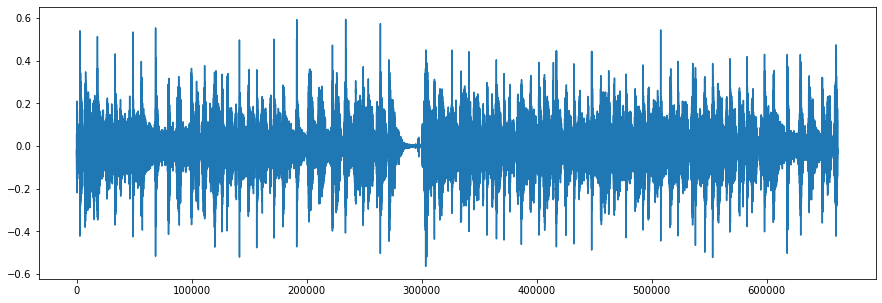

In [21]:
harmonics,percussive=librosa.effects.hpss(y)
plt.figure(figsize=(15,5))
plt.plot(harmonics);
plt.figure(figsize=(15,5))
plt.plot(percussive);

Centroids: [2622.73050509 2881.57344115 3268.66541681 ... 2937.61979423 3196.10716976
 3071.26493668] 

Shape of Spectral Centroids: (1293,) 

frames: range(0, 1293) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


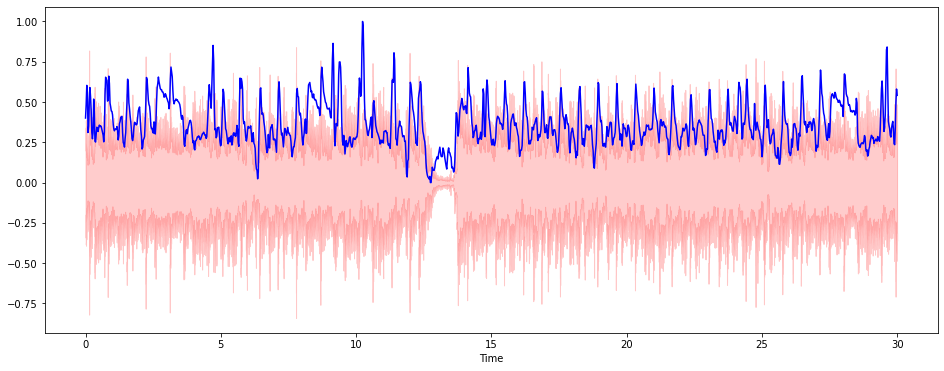

In [22]:
spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0] #returns spectral centroid per frame.
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y, sr=sr, alpha=0.2, color = 'red');
plt.plot(t, normalize(spectral_centroids), color='blue');

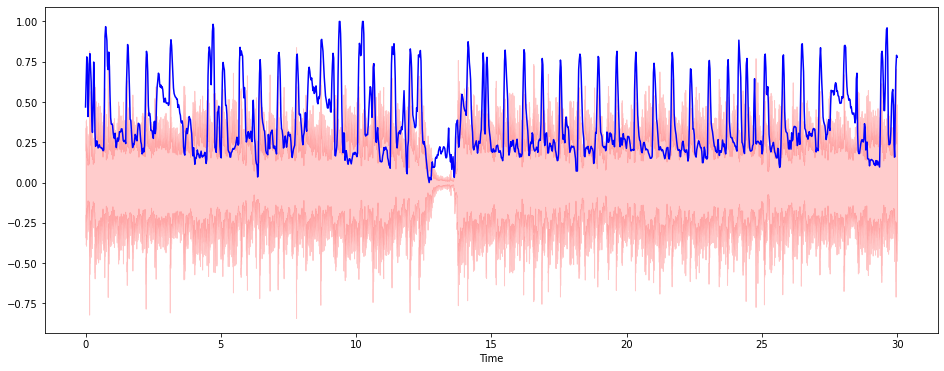

In [23]:
spectral_rolloff = librosa.feature.spectral_rolloff(y, sr=sr)[0]
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y, sr=sr, alpha=0.2, color = 'red');
plt.plot(t, normalize(spectral_rolloff), color='blue');

mfccs shape: (20, 1293)


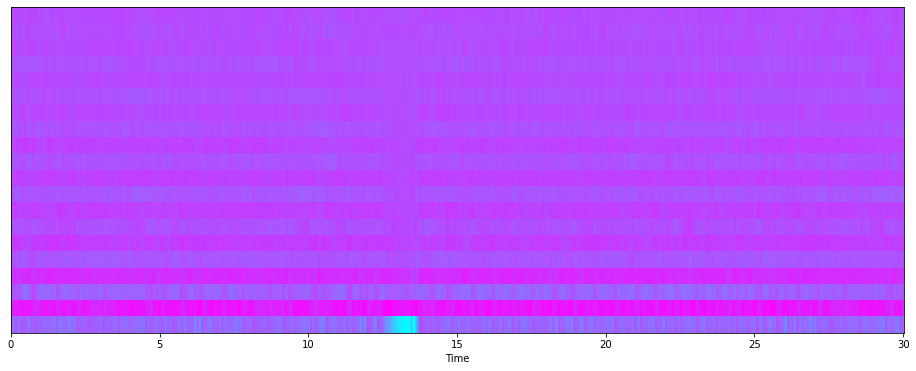

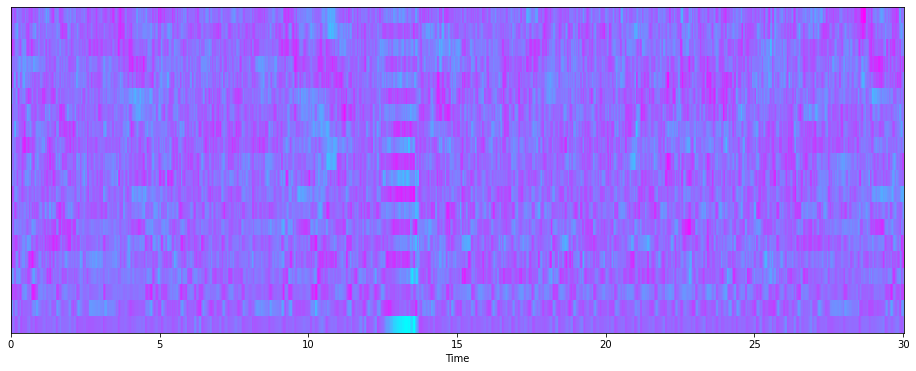

In [24]:
mfccs = librosa.feature.mfcc(y, sr=sr)
print('mfccs shape:', mfccs.shape)
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');
#the data is in small range, hence need to be scaled.
mfccs = sklearn.preprocessing.scale(mfccs,axis=1)
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

Chromogram shape: (12, 1293)


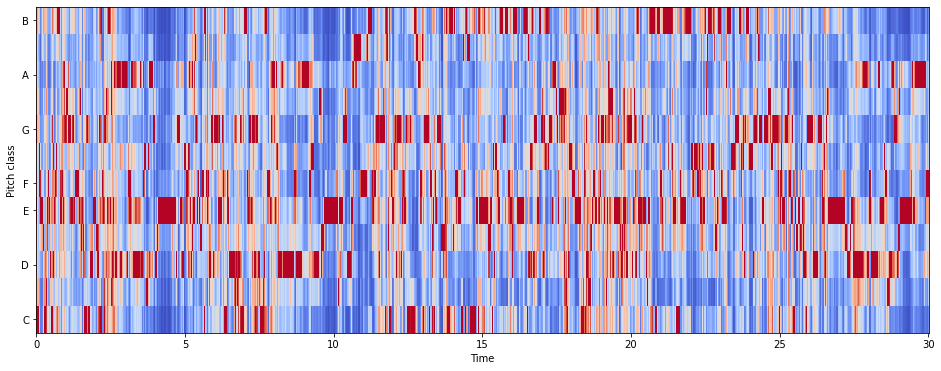

In [25]:
chromagram = librosa.feature.chroma_stft(y, sr=sr, hop_length=hop_length)
print('Chromogram shape:', chromagram.shape)
plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length,cmap='coolwarm');

In [26]:
#reading the 30 s csv
data=pd.read_csv(os.path.join(path,'features_30_sec.csv'))
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [27]:
data.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [28]:
from sklearn import preprocessing
data=data.iloc[0:,2:]
Y=data.loc[:,'label']
X=data.loc[:,data.columns!='label']

cols=X.columns
min_max_scaler=preprocessing.MinMaxScaler()
scaled_X=min_max_scaler.fit_transform(X) #the column names are removed
X=pd.DataFrame(scaled_X,columns=cols)

In [29]:
from sklearn.decomposition import PCA
n=10
pca=PCA(n_components=n)
pc=pca.fit_transform(X)
col_names=[f'PC{i}' for i in range(1,n+1)]
data_X=pd.DataFrame(data=pc,columns=col_names)

final_df=pd.concat([data_X,Y],axis=1)
final_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,label
0,-0.394212,-0.116145,-0.099806,0.042689,-0.121922,0.107266,-0.017494,-0.003765,0.023459,0.030935,blues
1,0.052019,-0.270757,0.427637,-0.026008,-0.262903,-0.105095,-0.136280,-0.212256,-0.102066,0.041485,blues
2,-0.479184,-0.224616,-0.014295,-0.233705,-0.025667,0.267477,0.075904,0.190766,0.132839,0.016935,blues
3,0.017145,-0.439886,0.017747,-0.067034,-0.434105,0.239529,-0.059289,-0.271078,-0.048625,0.034633,blues
4,-0.160395,-0.508617,0.073920,-0.360533,0.480087,0.099143,0.227757,-0.001936,0.127938,0.125548,blues


Text(0, 0.5, 'Principal Component 2')

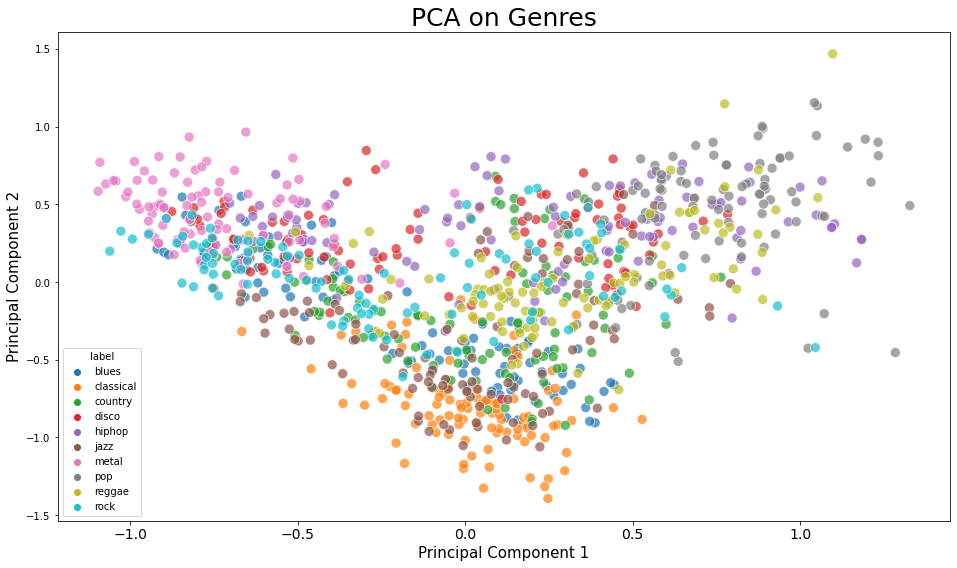

In [30]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "PC1", y = "PC2", data = final_df, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)

Text(0, 0.5, 'Principal Component 10')

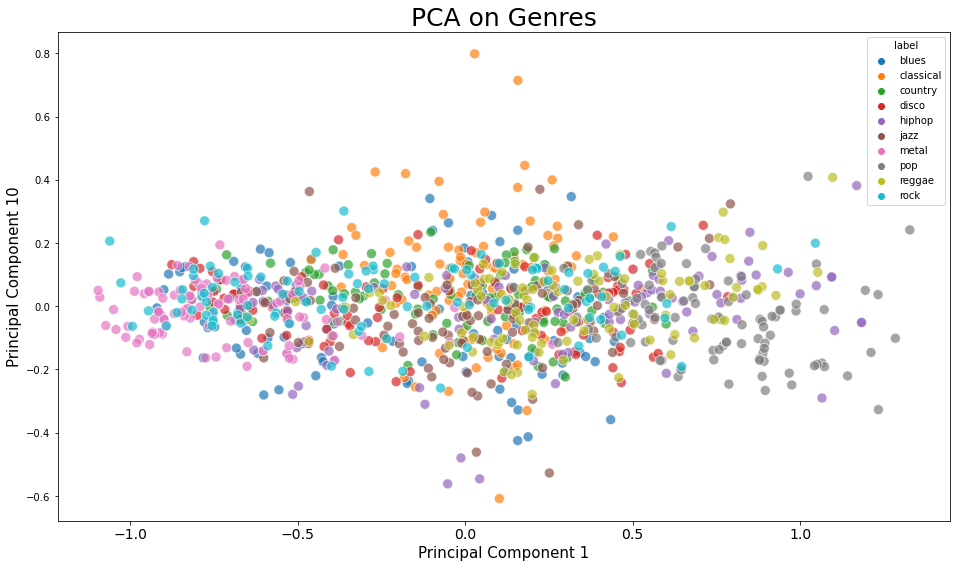

In [31]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "PC1", y = "PC10", data = final_df, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 10", fontsize = 15)

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [33]:
#reading the 3 s csv
data= pd.read_csv(os.path.join(path,'features_3_sec.csv'))
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [34]:
data.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [35]:
data=data.iloc[0:,2:]
Y=data.loc[:,'label']
X=data.loc[:,data.columns!='label']

cols=X.columns

scaler=preprocessing.MinMaxScaler()
scaled_X=scaler.fit_transform(X)

X=pd.DataFrame(scaled_X,columns=cols)

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=21)

In [37]:
def model_assess(model,title):
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

In [38]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

Accuracy Naive Bayes : 0.52386 



In [39]:
# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

Accuracy Stochastic Gradient Descent : 0.64298 



In [40]:
# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

Accuracy KNN : 0.8038 



In [41]:
# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

Accuracy Decission trees : 0.64665 



In [42]:
# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

Accuracy Random Forest : 0.79479 



In [43]:
# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

Accuracy Support Vector Machine : 0.74274 



In [44]:
# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

Accuracy Logistic Regression : 0.67434 



In [45]:
# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

Accuracy Neural Nets : 0.70103 



In [46]:
le=LabelEncoder()
labels=le.fit_transform(Y)
X_train,X_test,y_train,y_test=train_test_split(X,labels,test_size=0.3,random_state=21)

In [47]:
# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train,y_train)
preds=xgb.predict(X_test)
print('Accuracy',"xgb", ':', round(accuracy_score(y_test, preds), 5), '\n')

Accuracy xgb : 0.89656 



In [48]:
# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
xgbrf.fit(X_train,y_train)
preds=xgbrf.predict(X_test)
print('Accuracy',"xgbrf", ':', round(accuracy_score(y_test, preds), 5), '\n')

Accuracy xgbrf : 0.74708 



In [49]:
#improving xgb gradient booster
xgb1=XGBClassifier(n_estimators=1400,learning_rate=0.03)
xgb1.fit(X_train,y_train)
preds=xgb1.predict(X_test)
print('Accuracy',"xgb1", ':', round(accuracy_score(y_test, preds), 5), '\n')  

Accuracy xgb1 : 0.89923 



In [50]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing

In [51]:
data = pd.read_csv(f'{path}/features_30_sec.csv', index_col='filename')

In [52]:
labels = data[['label']]

In [53]:
# Drop labels from original dataframe
data = data.drop(columns=['length','label'])
data.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
filename,,,,,,,,,,,,,,,,,,,,,
blues.00000.wav,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,...,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035
blues.00001.wav,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,...,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282
blues.00002.wav,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,...,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025
blues.00003.wav,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,...,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339
blues.00004.wav,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,...,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160


In [54]:
# Scale the data
data_scaled=preprocessing.scale(data)
print('Scaled data type:', type(data_scaled))

Scaled data type: <class 'numpy.ndarray'>


In [63]:
# Cosine similarity
similarity = cosine_similarity(data_scaled)
print("Similarity shape:", similarity.shape)

# Convert into a dataframe and then set the row index and column names as labels
sim_df_labels = pd.DataFrame(similarity)

Similarity shape: (1000, 1000)


In [58]:
sim_df_names = sim_df_labels.set_index(labels.index)

In [59]:
sim_df_names.columns = labels.index

In [60]:
sim_df_names.head()

filename,blues.00000.wav,blues.00001.wav,blues.00002.wav,blues.00003.wav,blues.00004.wav,blues.00005.wav,blues.00006.wav,blues.00007.wav,blues.00008.wav,blues.00009.wav,...,rock.00090.wav,rock.00091.wav,rock.00092.wav,rock.00093.wav,rock.00094.wav,rock.00095.wav,rock.00096.wav,rock.00097.wav,rock.00098.wav,rock.00099.wav
filename,,,,,,,,,,,,,,,,,,,,,
blues.00000.wav,1.000000,0.049231,0.589618,0.284862,0.025561,-0.346688,-0.219483,-0.167626,0.641877,-0.097889,...,-0.082829,0.546169,0.578558,0.662590,0.571629,0.610942,0.640835,0.496294,0.284958,0.304098
blues.00001.wav,0.049231,1.000000,-0.096834,0.520903,0.080749,0.307856,0.318286,0.415258,0.120649,0.404168,...,-0.098111,-0.325126,-0.370792,-0.191698,-0.330834,-0.077301,-0.222119,-0.302573,0.499562,0.311723
blues.00002.wav,0.589618,-0.096834,1.000000,0.210411,0.400266,-0.082019,-0.028061,0.104446,0.468113,-0.132532,...,-0.032408,0.561074,0.590779,0.583293,0.514537,0.495707,0.566837,0.589983,0.216378,0.321069
blues.00003.wav,0.284862,0.520903,0.210411,1.000000,0.126437,0.134796,0.300746,0.324566,0.352758,0.295184,...,-0.320107,-0.206516,-0.151132,0.041986,-0.172515,-0.000287,0.020515,-0.107821,0.502279,0.183210
blues.00004.wav,0.025561,0.080749,0.400266,0.126437,1.000000,0.556066,0.482195,0.623455,0.029703,0.471657,...,0.087605,0.017366,0.138035,0.104684,-0.034594,0.063454,0.063546,0.172944,0.153192,0.061785


In [56]:
def find_similar_songs(name):
    # Find songs most similar to another song
    series = sim_df_names[name].sort_values(ascending = False)
    
    # Remove cosine similarity == 1 (songs will always have the best match with themselves)
    series = series.drop(name)
    
    # Display the 5 top matches 
    print("\n*******\nSimilar songs to ", name)
    print(series.head(5))

In [61]:
find_similar_songs('metal.00002.wav') 


*******
Similar songs to  metal.00002.wav
filename
metal.00028.wav    0.904367
metal.00059.wav    0.896096
rock.00018.wav     0.891910
rock.00017.wav     0.886526
rock.00016.wav     0.867508
Name: metal.00002.wav, dtype: float64
